In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import pprint
from census import Census
from us import states



In [13]:
#311dataphillytop5
line_chart = pd.read_csv("final_311_census.csv", encoding="utf-8")
#line_chart.sort_values(by="CREATE_DATE", ascending=False)
line_chart.head()

,CREATED_ON,CREATE_DATE,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,X,Y,location,ZIP,Household Income,Population,Median Age,Per Capita Income,Poverty Count
0,2015-04-20T08:38:00,2015-04-20,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.015178,40.392419,"40.3924186,-80.01517829999999",15226,54441,13632,39.5,29870,1329
1,2015-04-20T08:42:00,2015-04-20,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.018696,40.400007,"40.4000074,-80.0186958",15226,54441,13632,39.5,29870,1329
2,2015-04-20T08:43:00,2015-04-20,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.016089,40.399618,"40.399617799999994,-80.01608940000001",15226,54441,13632,39.5,29870,1329
3,2015-04-20T09:15:00,2015-04-20,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.007267,40.383212,"40.3832124,-80.0072673",15226,54441,13632,39.5,29870,1329
4,2015-04-20T09:16:00,2015-04-20,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.009981,40.384611,"40.3846107,-80.0099811",15226,54441,13632,39.5,29870,1329


In [14]:
#Total count by request and date
create_counts = line_chart["CREATE_DATE" ].value_counts()
cr_rename = create_counts.rename_axis("date").reset_index(name = "counts")
total_requests= cr_rename.sort_values(by='date', ascending=True)

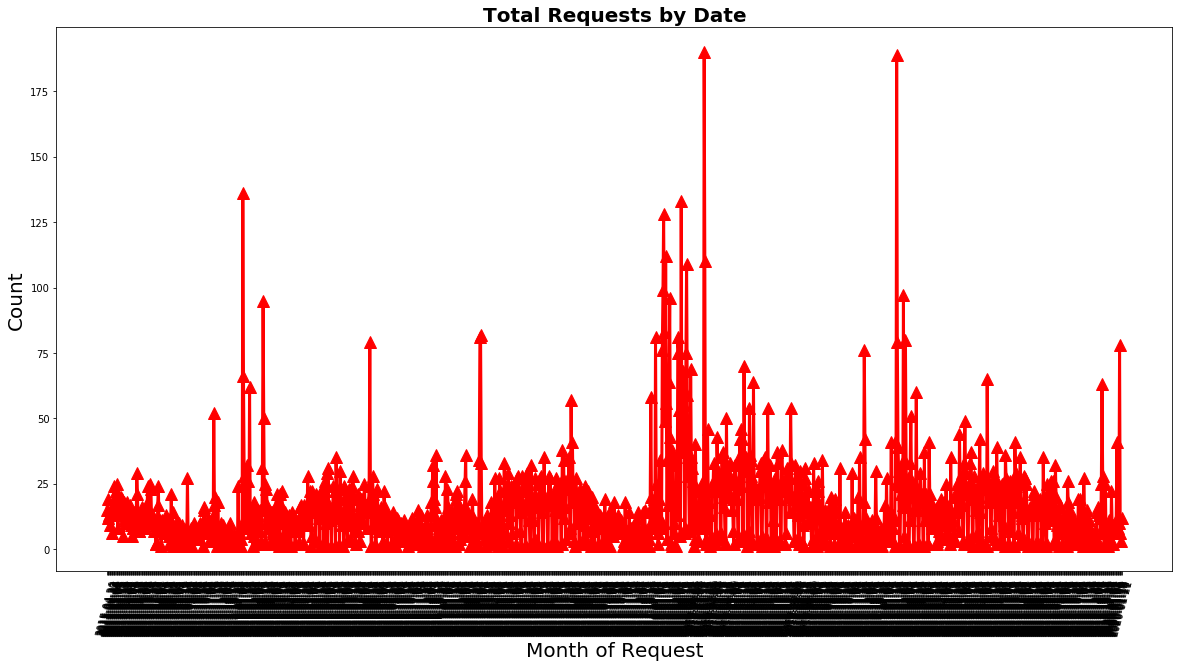

In [15]:
#Creates Graph for total counts by date
plt.figure(figsize=(20,10))
plt.plot( total_requests["date"], total_requests["counts"], color="red", label="Requests", 
         marker='^',  linewidth=3, markersize=12)# 1st value is X, second is Y
plt.xticks(rotation=75)
plt.title("Total Requests by Date", fontsize=20, fontweight="bold")
plt.xlabel("Month of Request", fontsize=20)
plt.ylabel("Count",  fontsize=20)

plt.show()

In [16]:
#count = line_chart["REQUEST_TYPE"].value_counts()
#print(count)

In [17]:
#-----------------------Potholes----------------------------------------
potholes = line_chart.loc[(line_chart["REQUEST_TYPE"] == "Potholes")]
potholes = pd.DataFrame(potholes[["CREATE_DATE","REQUEST_TYPE"]] )
#print(potholes)
potholes = potholes["CREATE_DATE" ].value_counts()
potholes = potholes.rename_axis("date").reset_index(name = "counts")
potholes = potholes.sort_values(by='date', ascending=True)
print(potholes)

#----------------------WEEDS-------------------------------------------------------
weed = line_chart.loc[(line_chart["REQUEST_TYPE"] == "Weeds/Debris")]
#print(potholes)
weed = pd.DataFrame(weed[["CREATE_DATE","REQUEST_TYPE"]] )
weed = weed["CREATE_DATE" ].value_counts()
weed = weed.rename_axis("date").reset_index(name = "counts")
weed= weed.sort_values(by='date', ascending=True)
#print(weed)

#--------------------SNOW-----------------------------------------------------------
snow = line_chart.loc[(line_chart["REQUEST_TYPE"] == "Snow/Ice removal")]
#print(potholes)
snow = pd.DataFrame(snow[["CREATE_DATE","REQUEST_TYPE"]] )
snow = snow["CREATE_DATE" ].value_counts()
snow = snow.rename_axis("date").reset_index(name = "counts")
snow= snow.sort_values(by='date', ascending=True)
#print(snow.head())

#--------------------BLD Maintence-----------------------------------------------------------
bld = line_chart.loc[(line_chart["REQUEST_TYPE"] == "Building Maintenance")]
#print(potholes)
bld = pd.DataFrame(bld[["CREATE_DATE","REQUEST_TYPE"]] )
bld = bld["CREATE_DATE" ].value_counts()
bld = bld.rename_axis("date").reset_index(name = "counts")
bld= bld.sort_values(by='date', ascending=True)
#print(bld.head())

#--------------------abondoned vehicle-----------------------------------------------------------
car = line_chart.loc[(line_chart["REQUEST_TYPE"] == "Abandoned Vehicle")]
#print(potholes)
car = pd.DataFrame(car[["CREATE_DATE","REQUEST_TYPE"]] )
car = car["CREATE_DATE" ].value_counts()
car = car.rename_axis("date").reset_index(name = "counts")
car= car.sort_values(by='date', ascending=True)
#print(car.head())





            date  counts
131   2015-04-20      15
77    2015-04-21      19
204   2015-04-22      12
173   2015-04-23      13
386   2015-04-24       8
...          ...     ...
647   2020-01-15       5
753   2020-01-16       4
1257  2020-01-17       1
1260  2020-01-19       1
1016  2020-01-21       2

[1319 rows x 2 columns]


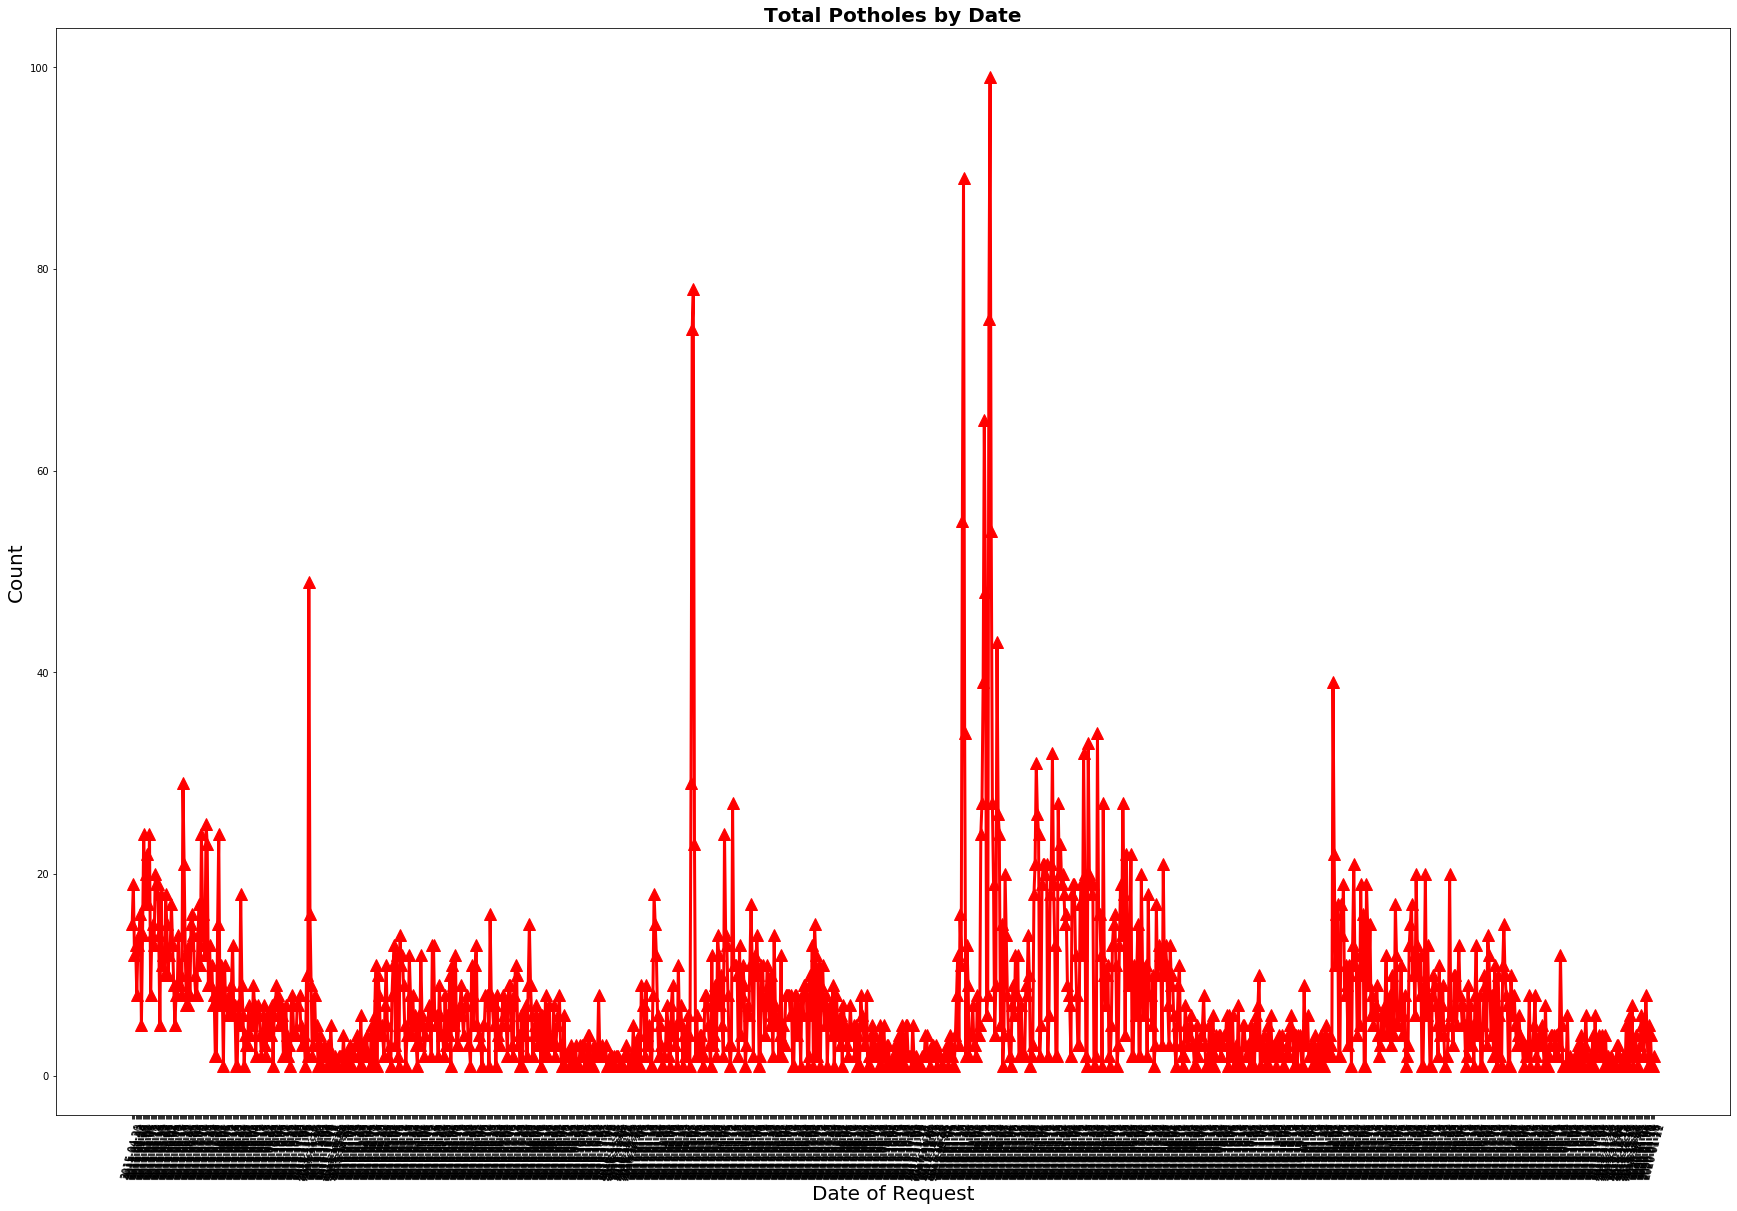

In [18]:
#print(potholes.head())
plt.figure(figsize=(30,20))
plt.plot( potholes["date"], potholes["counts"], color="red", label="Potholes", 
         marker='^',  linewidth=3, markersize=12)
plt.xticks(rotation=75)
plt.title("Total Potholes by Date", fontsize=20, fontweight="bold")
plt.xlabel("Date of Request", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.savefig('Pot_hole_line_graph.png')
plt.show()

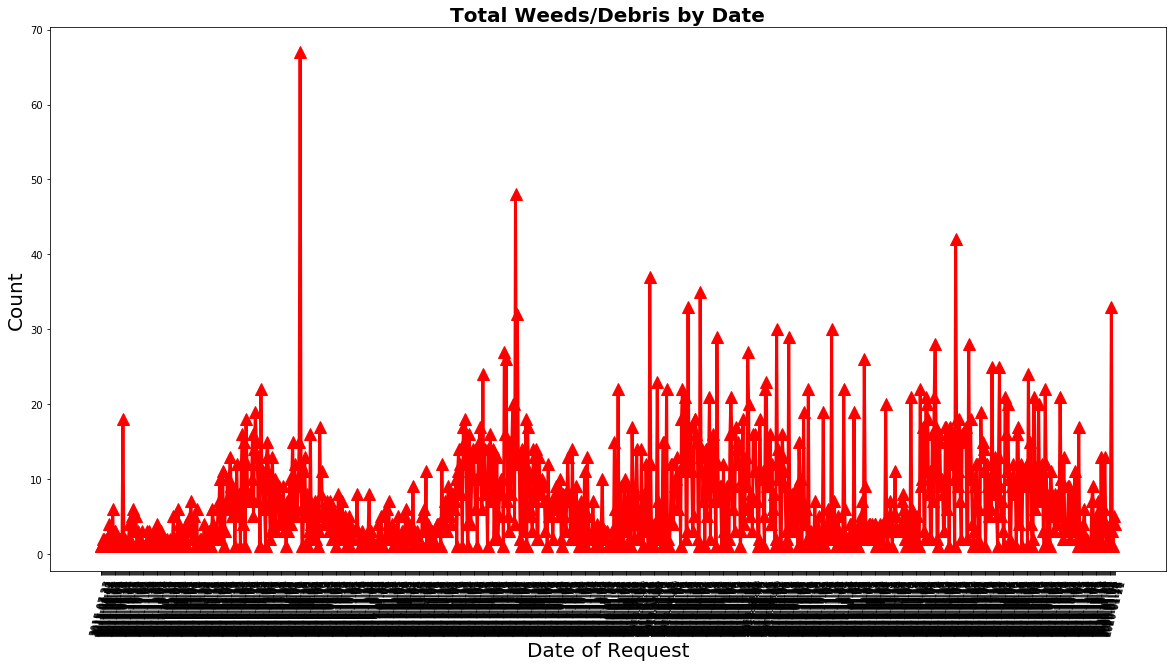

In [19]:
#print(potholes.head())
plt.figure(figsize=(20,10))
plt.plot( weed["date"], weed["counts"], color="red", label="Weeds/Debris", 
         marker='^',  linewidth=3, markersize=12)
plt.xticks(rotation=75)
plt.title("Total Weeds/Debris by Date", fontsize=20, fontweight="bold")
plt.xlabel("Date of Request", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.savefig('Weeds_Debris.png')
plt.show()

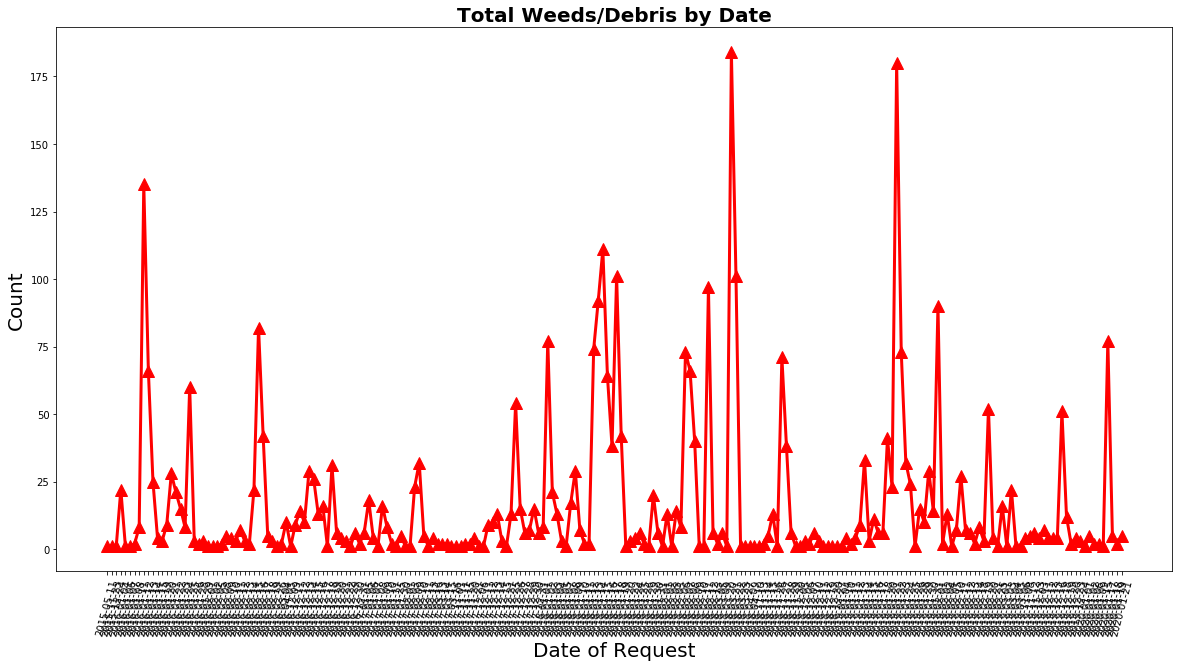

In [20]:
#print(potholes.head())
plt.figure(figsize=(20,10))
plt.plot( snow["date"], snow["counts"], color="red", label="Snow/Ice removal", 
         marker='^',  linewidth=3, markersize=12)
plt.xticks(rotation=75)
plt.title("Total Weeds/Debris by Date", fontsize=20, fontweight="bold")
plt.xlabel("Date of Request", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.savefig('Snow_ice_removal.png')
plt.show()

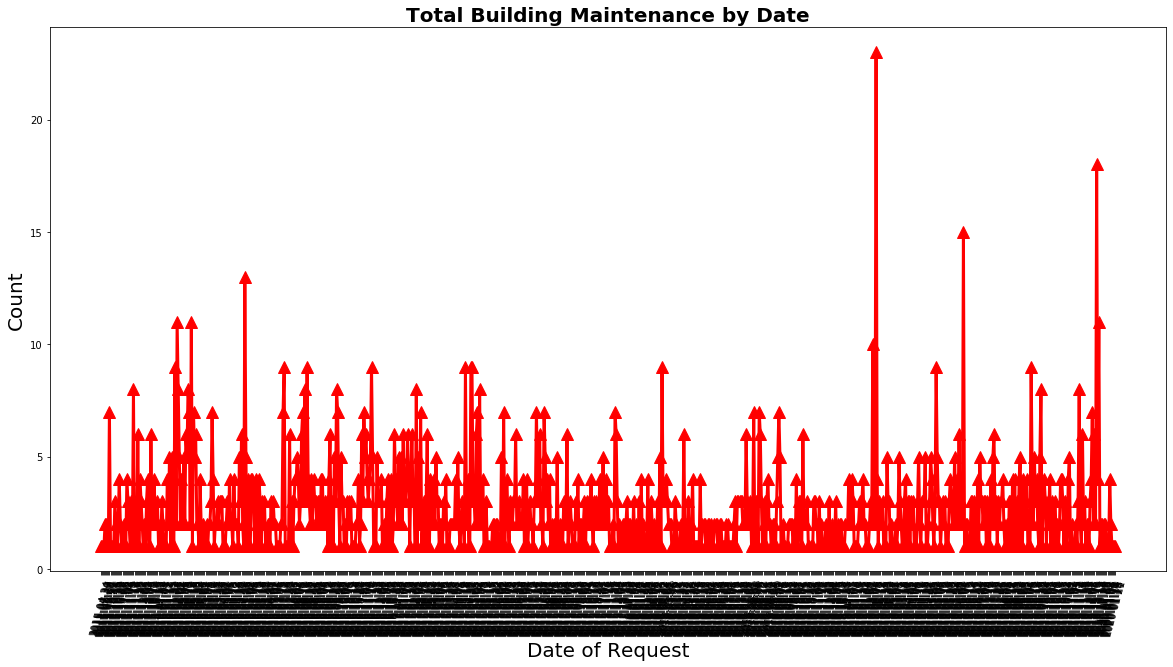

In [21]:
#print(potholes.head())
plt.figure(figsize=(20,10))
plt.plot( bld["date"], bld["counts"], color="red", label="Building Maintenance", 
         marker='^',  linewidth=3, markersize=12)
plt.xticks(rotation=75)
plt.title("Total Building Maintenance by Date", fontsize=20, fontweight="bold")
plt.xlabel("Date of Request", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.savefig('Building_Maintenance.png')

plt.show()

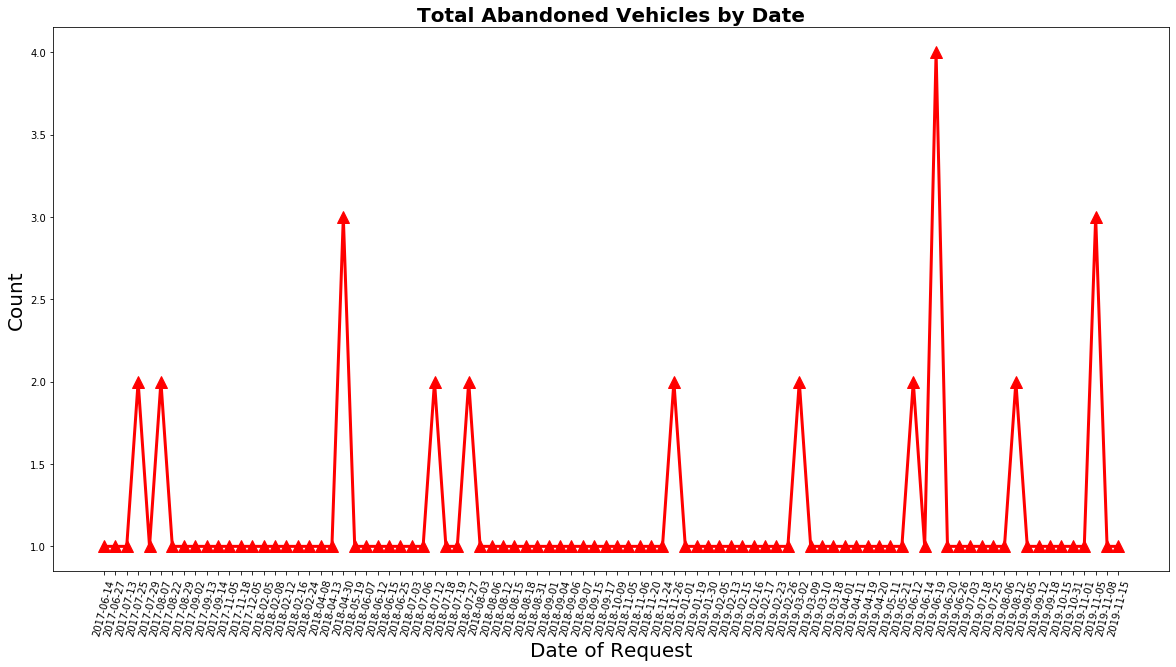

In [22]:
#print(potholes.head())
plt.figure(figsize=(20,10))
plt.plot( car["date"], car["counts"], color="red", label="Abandoned Vehicle", 
         marker='^',  linewidth=3, markersize=12)
plt.xticks(rotation=75)
plt.title("Total Abandoned Vehicles by Date", fontsize=20, fontweight="bold")
plt.xlabel("Date of Request", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.savefig('Abandoned_Vehicle.png')
plt.show()